In [55]:
import numpy as np 
from matplotlib import pyplot as plt

In [56]:
def diffuse_spread_recover(x, y, status, d, beta, gamma, alpha, L):
    """
    Function performing the diffusion step, the infection step, the recovery step, 
    and the temporary immunity step happening in one turn for a population of agents.
    
    Parameters
    ==========
    x, y : Agents' positions.
    status : Agents' status.
    d : Diffusion probability.
    beta : Infection probability.
    gamma : Recovery probability.
    alpha : Probability of recovered agents becoming susceptible again.
    L : Side of the square lattice.
    """
    N = np.size(x)
    
    # Diffusion step.
    diffuse = np.random.rand(N)
    move = np.random.randint(4, size=N)
    for i in range(N):
        if diffuse[i] < d:
            if move[i] == 0:
                x[i] = x[i] - 1
            elif move[i] == 1:
                y[i] = y[i] - 1
            elif move[i] == 2:
                x[i] = x[i] + 1
            else: 
                # move[i] == 3
                y[i] = y[i] + 1
                
    # Enforce periodic boundary conditions (PBC).
    x = x % L
    y = y % L

    # Spreading disease step.
    infected = np.where(status == 1)[0]
    for i in infected:
        # Check whether other particles share the same position.
        same_x = np.where(x == x[i])
        same_y = np.where(y == y[i])
        same_cell = np.intersect1d(same_x, same_y)
        for j in same_cell:
            if status[j] == 0:
                if np.random.rand() < beta:
                    status[j] = 1
        
    # Recover step.
    for i in infected:
        # Check whether the infected recovers.
        if np.random.rand() < gamma:
            status[i] = 2

    # Recovered agents becoming susceptible again
    recovered = np.where(status == 2)[0]
    for i in recovered:
        if np.random.rand() < alpha:
            status[i] = 0
    
    return x, y, status

## P1 & Q1

I0 = 30, 5 runs, steps = 50000, alpha = 0.05

the disease dose not die out, because the number of recover below 10.

In [57]:
# Simulation parameters.
N_part = 1000  # Total agent population.
d = 0.95  # Diffusion probability.
beta = 0.05  # Infection spreading probability.
gamma = 0.001  # Recovery probability.
alpha = 0.05  # Probability of losing immunity.
L = 200  # Side of the lattice.

I0 = 30  # Initial number of infected agents.

N_steps = 50000
n_runs = 5

# Initialize agents position.
x = np.random.randint(L, size=N_part)
y = np.random.randint(L, size=N_part)

# Initialize agents status.
status = np.zeros(N_part)  # All agents are susceptible initially.
status[0:I0] = 1  # Set the first I0 agents as infected.

S_runs = []
I_runs = []
R_runs = []

for run in range(n_runs):
    print(f"Starting run {run + 1}...")

    # Initialize agents position and status.
    x = np.random.randint(L, size=N_part)
    y = np.random.randint(L, size=N_part)
    status = np.zeros(N_part)
    status[0:I0] = 1  # Set the first I0 agents as infected.


    step = 0
    S = [N_part - I0]
    I = [I0]
    R = [0]
    S.append(N_part - I0)
    I.append(I0)
    R.append(0)

    running = True  # Flag to control the loop.
    while running:

        x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, alpha, L)  
        
        S.append(np.size(np.where(status == 0)[0]))
        I.append(np.size(np.where(status == 1)[0]))
        R.append(np.size(np.where(status == 2)[0]))
        
        step += 1

        if step % 10000 ==0:
            print(f'step ={step}, susceptible = {S[-1]}, infectious ={I[-1]}, recovered = {R[-1]}, ')
        
        if step > N_steps: 
            running = False

    S_runs.append(S)
    I_runs.append(I)
    R_runs.append(R)

        
print('Done.')



Starting run 1...
step =10000, susceptible = 960, infectious =39, recovered = 1, 
step =20000, susceptible = 913, infectious =84, recovered = 3, 
step =30000, susceptible = 864, infectious =136, recovered = 0, 
step =40000, susceptible = 897, infectious =103, recovered = 0, 
step =50000, susceptible = 824, infectious =171, recovered = 5, 
Starting run 2...
step =10000, susceptible = 938, infectious =62, recovered = 0, 
step =20000, susceptible = 945, infectious =55, recovered = 0, 
step =30000, susceptible = 901, infectious =95, recovered = 4, 
step =40000, susceptible = 859, infectious =140, recovered = 1, 
step =50000, susceptible = 887, infectious =113, recovered = 0, 
Starting run 3...
step =10000, susceptible = 898, infectious =100, recovered = 2, 
step =20000, susceptible = 814, infectious =184, recovered = 2, 
step =30000, susceptible = 835, infectious =159, recovered = 6, 
step =40000, susceptible = 859, infectious =138, recovered = 3, 
step =50000, susceptible = 916, infectiou

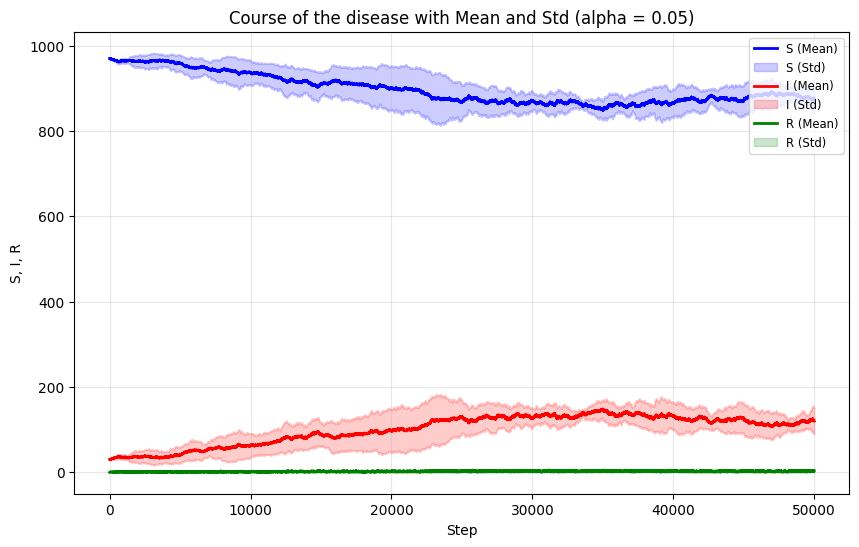

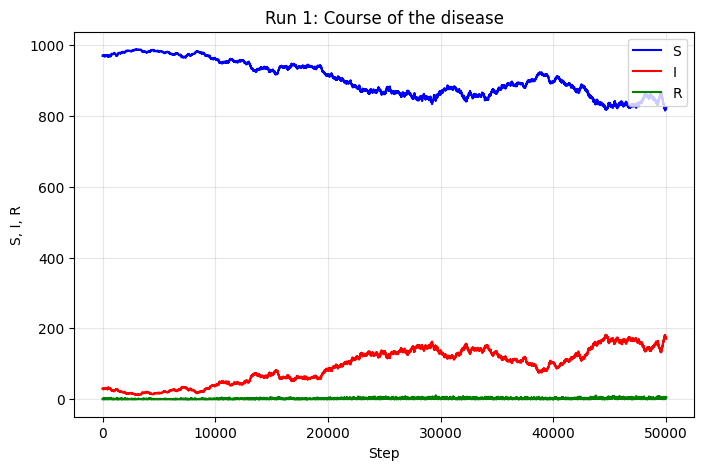

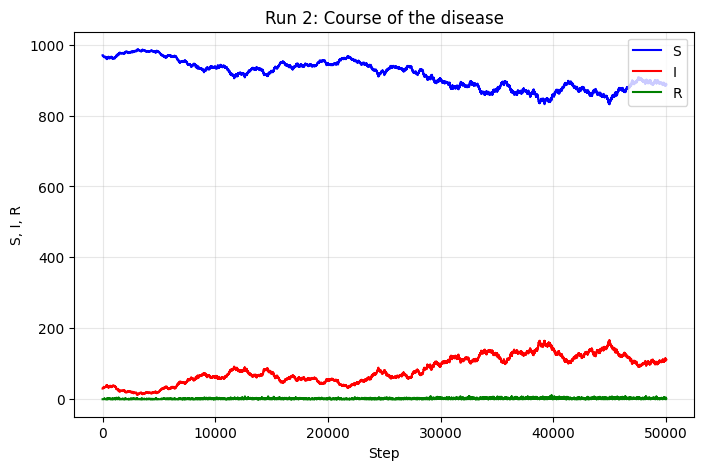

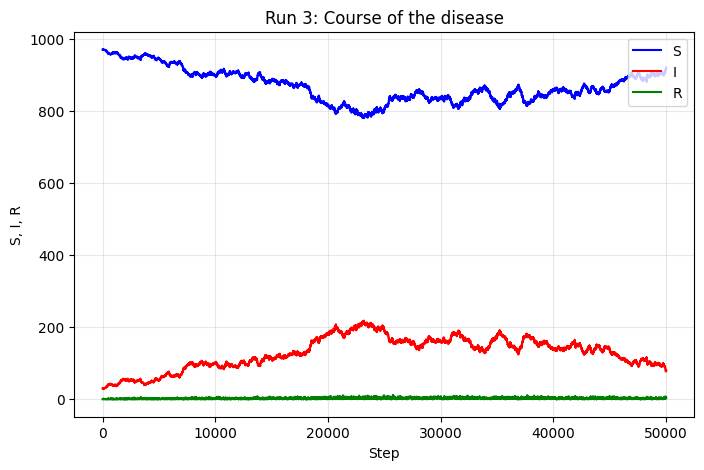

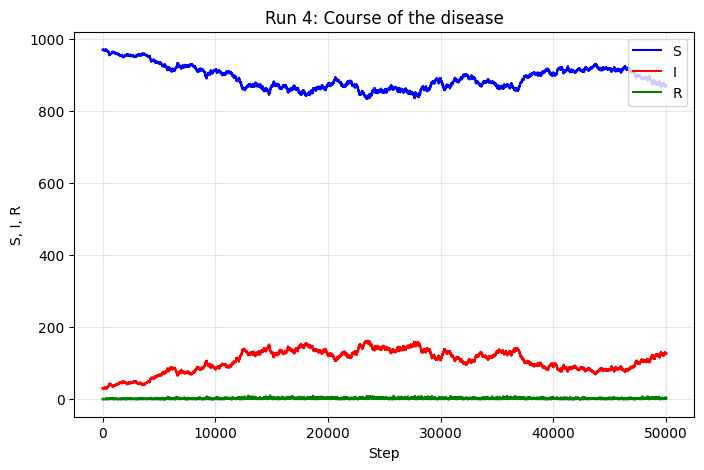

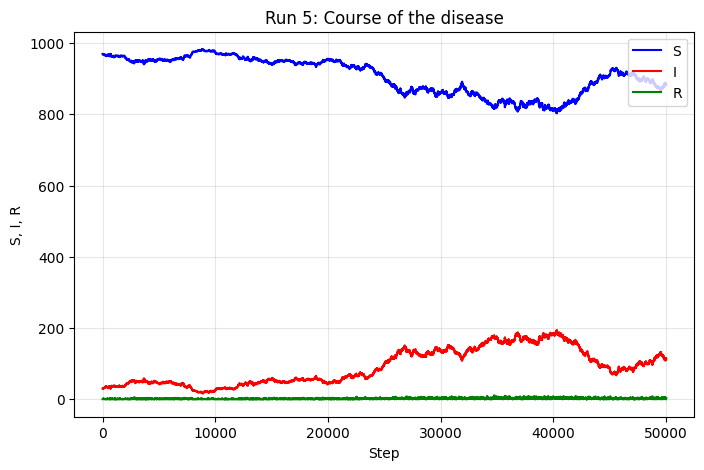

In [58]:
S_array = np.array(S_runs)
I_array = np.array(I_runs)
R_array = np.array(R_runs)

S_mean = np.mean(S_array, axis=0)
I_mean = np.mean(I_array, axis=0)
R_mean = np.mean(R_array, axis=0)

S_std = np.std(S_array, axis=0)
I_std = np.std(I_array, axis=0)
R_std = np.std(R_array, axis=0)

t = np.arange(S_mean.shape[0])

plt.figure(figsize=(10, 6))

# Plot mean with error bars
plt.plot(t, S_mean, 'b-', label='S (Mean)', linewidth=2)  # 蓝色实线
plt.fill_between(t, S_mean - S_std, S_mean + S_std, color='blue', alpha=0.2, label='S (Std)')  

plt.plot(t, I_mean, 'r-', label='I (Mean)', linewidth=2)  # 红色实线
plt.fill_between(t, I_mean - I_std, I_mean + I_std, color='red', alpha=0.2, label='I (Std)')  

plt.plot(t, R_mean, 'g-', label='R (Mean)', linewidth=2)  # 绿色实线
plt.fill_between(t, R_mean - R_std, R_mean + R_std, color='green', alpha=0.2, label='R (Std)')  
plt.legend(loc='upper right', fontsize='small')
plt.title(f'Course of the disease with Mean and Std (alpha = {alpha})')
plt.xlabel('Step')
plt.ylabel('S, I, R')
plt.grid(alpha=0.3) 
plt.savefig('P1_mean_and_std.png', dpi=300)
plt.show()


for run in range(len(S_runs)):
    t = np.arange(len(S_runs[run]))
    
    plt.figure(figsize=(8, 5))
    plt.plot(t, S_runs[run], 'b-', label='S')
    plt.plot(t, I_runs[run], 'r-', label='I')
    plt.plot(t, R_runs[run], 'g-', label='R')
    plt.legend(loc='upper right')
    plt.title(f'Run {run + 1}: Course of the disease')
    plt.xlabel('Step')
    plt.ylabel('S, I, R')
    plt.grid(alpha=0.3)
    plt.savefig(f'Run_{run + 1}.png', dpi=300)  # 保存每个运行的图
    plt.show()



## P2 & Q2

I0 = 10, 5 runs, steps = 50000, alpha = 0.005

In [52]:
# Simulation parameters.
N_part = 1000  # Total agent population.
d = 0.95  # Diffusion probability.
beta = 0.05  # Infection spreading probability.
gamma = 0.001  # Recovery probability.
alpha = 0.005  # Probability of losing immunity.
L = 200  # Side of the lattice.

I0 = 10  # Initial number of infected agents.

N_steps = 50000
n_runs = 5

# Initialize agents position.
x = np.random.randint(L, size=N_part)
y = np.random.randint(L, size=N_part)

# Initialize agents status.
status = np.zeros(N_part)  # All agents are susceptible initially.
status[0:I0] = 1  # Set the first I0 agents as infected.

S_runs = []
I_runs = []
R_runs = []

for run in range(n_runs):
    print(f"Starting run {run + 1}...")

    # Initialize agents position and status.
    x = np.random.randint(L, size=N_part)
    y = np.random.randint(L, size=N_part)
    status = np.zeros(N_part)
    status[0:I0] = 1  # Set the first I0 agents as infected.


    step = 0
    S = [N_part - I0]
    I = [I0]
    R = [0]
    S.append(N_part - I0)
    I.append(I0)
    R.append(0)

    running = True  # Flag to control the loop.
    while running:

        x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, alpha, L)  
        
        S.append(np.size(np.where(status == 0)[0]))
        I.append(np.size(np.where(status == 1)[0]))
        R.append(np.size(np.where(status == 2)[0]))
        
        step += 1

        if step % 10000 ==0:
            print(f'step ={step}, susceptible = {S[-1]}, infectious ={I[-1]}, recovered = {R[-1]}, ')
        
        if step > N_steps: 
            running = False

    S_runs.append(S)
    I_runs.append(I)
    R_runs.append(R)

        
print('Done.')

max_length = max(len(S) for S in S_runs)


for i in range(len(S_runs)):
    S_runs[i] += [S_runs[i][-1]] * (max_length - len(S_runs[i]))
    I_runs[i] += [I_runs[i][-1]] * (max_length - len(I_runs[i]))
    R_runs[i] += [R_runs[i][-1]] * (max_length - len(R_runs[i]))

S_array = np.array(S_runs)
I_array = np.array(I_runs)
R_array = np.array(R_runs)


Starting run 1...
step =10000, susceptible = 881, infectious =99, recovered = 20, 
step =20000, susceptible = 876, infectious =111, recovered = 13, 
step =30000, susceptible = 880, infectious =94, recovered = 26, 
step =40000, susceptible = 860, infectious =120, recovered = 20, 
step =50000, susceptible = 898, infectious =86, recovered = 16, 
Starting run 2...
step =10000, susceptible = 949, infectious =44, recovered = 7, 
step =20000, susceptible = 872, infectious =100, recovered = 28, 
step =30000, susceptible = 852, infectious =127, recovered = 21, 
step =40000, susceptible = 848, infectious =125, recovered = 27, 
step =50000, susceptible = 851, infectious =122, recovered = 27, 
Starting run 3...
step =10000, susceptible = 978, infectious =19, recovered = 3, 
step =20000, susceptible = 924, infectious =66, recovered = 10, 
step =30000, susceptible = 973, infectious =26, recovered = 1, 
step =40000, susceptible = 930, infectious =64, recovered = 6, 
step =50000, susceptible = 883, in

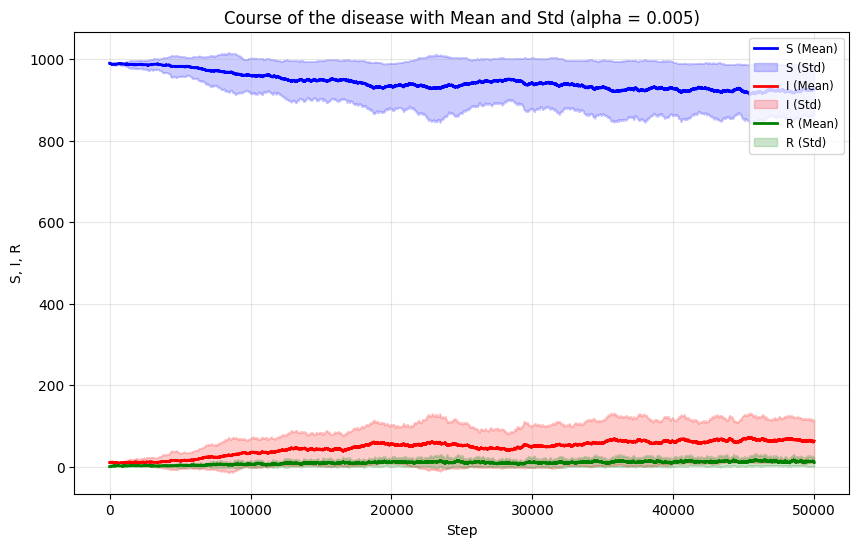

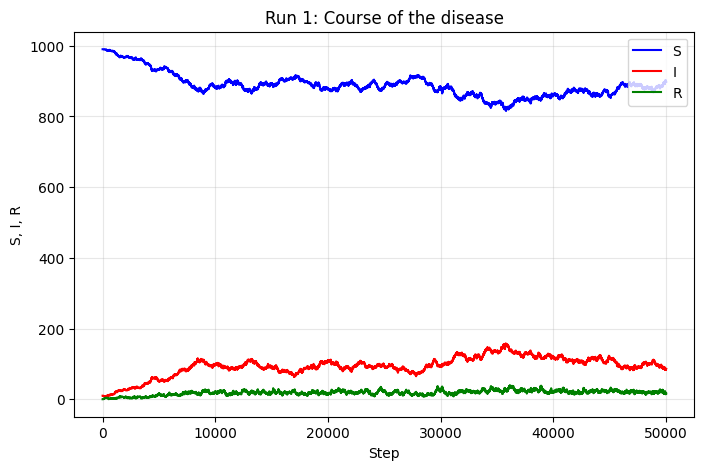

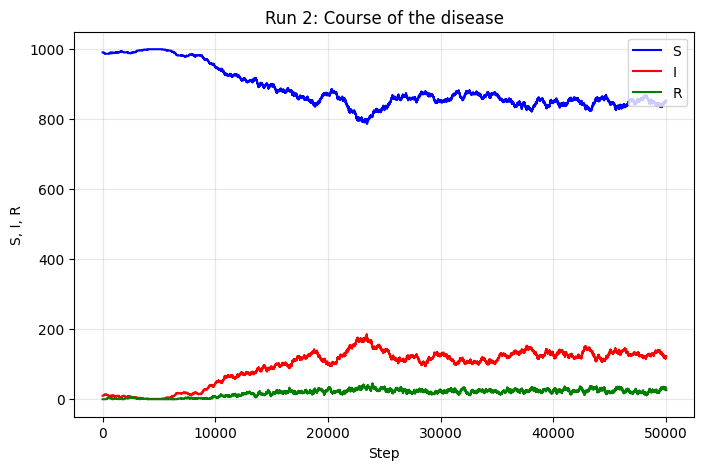

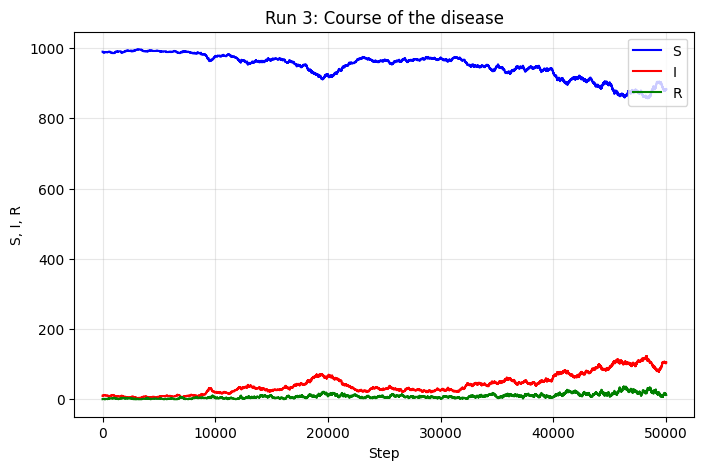

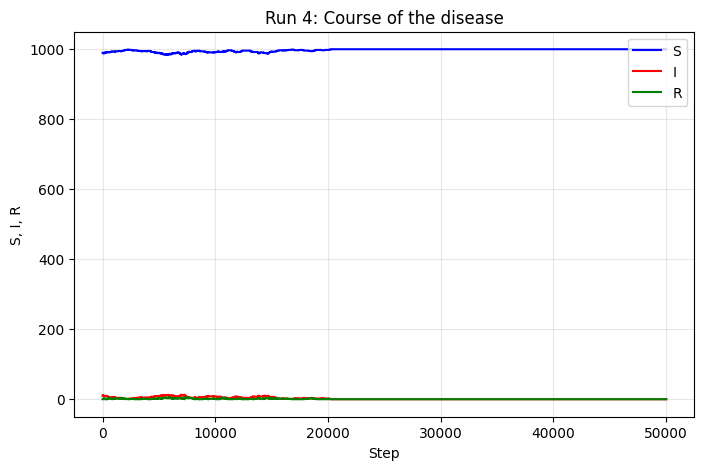

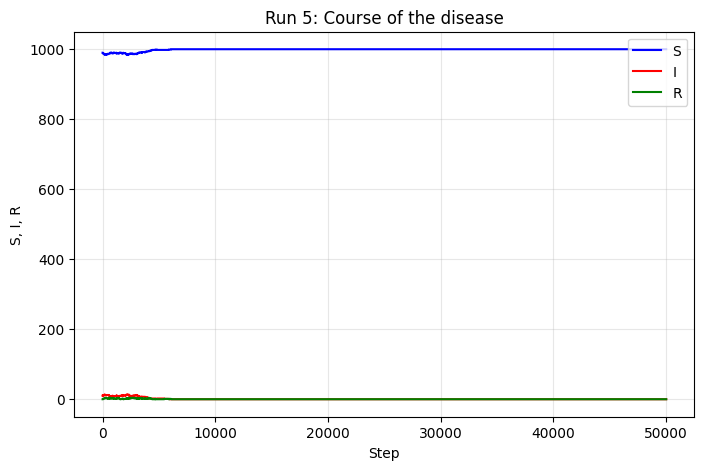

In [54]:


S_mean = np.mean(S_array, axis=0)
I_mean = np.mean(I_array, axis=0)
R_mean = np.mean(R_array, axis=0)

S_std = np.std(S_array, axis=0)
I_std = np.std(I_array, axis=0)
R_std = np.std(R_array, axis=0)

t = np.arange(S_mean.shape[0])

plt.figure(figsize=(10, 6))

# Plot mean with error bars
plt.plot(t, S_mean, 'b-', label='S (Mean)', linewidth=2)  
plt.fill_between(t, S_mean - S_std, S_mean + S_std, color='blue', alpha=0.2, label='S (Std)')  

plt.plot(t, I_mean, 'r-', label='I (Mean)', linewidth=2) 
plt.fill_between(t, I_mean - I_std, I_mean + I_std, color='red', alpha=0.2, label='I (Std)')  

plt.plot(t, R_mean, 'g-', label='R (Mean)', linewidth=2)  
plt.fill_between(t, R_mean - R_std, R_mean + R_std, color='green', alpha=0.2, label='R (Std)')  
plt.legend(loc='upper right', fontsize='small')
plt.title(f'Course of the disease with Mean and Std (alpha = {alpha})')
plt.xlabel('Step')
plt.ylabel('S, I, R')
plt.grid(alpha=0.3) 
plt.savefig('P2_mean_and_std.png', dpi=300)
plt.show()


for run in range(len(S_runs)):
    t = np.arange(len(S_runs[run]))
    
    plt.figure(figsize=(8, 5))
    plt.plot(t, S_runs[run], 'b-', label='S')
    plt.plot(t, I_runs[run], 'r-', label='I')
    plt.plot(t, R_runs[run], 'g-', label='R')
    plt.legend(loc='upper right')
    plt.title(f'Run {run + 1}: Course of the disease')
    plt.xlabel('Step')
    plt.ylabel('S, I, R')
    plt.grid(alpha=0.3)
    plt.savefig(f'Run_{run + 1}.png', dpi=300)  # 保存每个运行的图
    plt.show()

